# Data scientist and Data engineer test at Chilindo

## Test I
Understanding of concept
Please answer these questions shortly with only the key concept, answering in
bullet point is acceptable as well
1. What are the main difference between Machine learning and Deep learning
    * The number of hiddle layers in machine learning has 1 but deep learning can contain multiple layers and its the subset of machinelearning focus on just 1 type of model, neural network
2. Describe the concept of supervised learning and unsupervised learning
    * supervised learning is trying to learn (predict or classify  and find function) from the label data under the training data set
    * unsupervised learning is try to learn (aswell as supervised learnig), extract and mapping unlabel data from the structure  of the data
3. Select 2 examples of supervised learning and unsupervised learning and explain the concept of those two
    * supervised learning data with label>
        * classificaltion: predict the label data, type is category data
        * regression : predict the label data, type is quantity data
    * unsupervised learning
        * clustering: predict the label data, type is quantity data
        * dimensionality reduction: predict the label data, type is non quantity data and 
4. Give two example of artificial neural network and its application, when two use, advantages and disadvantages
    * Speech recognition
        * advantages: do not have to type if your hand full, convinice for long text, reduce typo if you do not know how to spell correctly ^^
        * disadvages: each accents different, I am thai (can't understand my dog sorry)
    * Handwriting recognition 
        * advantages: can put any note any where you want
        * disadvages: take longer to type on screen
5. What is data scientist for you? Is it only about machine learning or deep learning? or something else
    * Artificial Intelligence 


## Test II
You are supposed to build the following analysis program. Please following the template in python file (test.py).

The system is composed of two main processes, read raw data from database (Postgresql) and save it on Redis, second, get raw data from Redis, analyze and present final value on screen

***Provide a link to your work such as your Github to show all works you have done coded in these programming language Java, C++, and C#, or send us thecompressed version instead.***

### Instructure
- Create the table on Postgresql from given dataset (pokemon.csv)
- Read table from Postgresql and analyze data as following instruction
- Using the pokemon data with a number of variables
- Using the pokemon data set, containing 9 quantative variables (Index, Total,Hit Points, Attack Strength, Defense, Special Attack, Special Def, Speed, Generation) and 3 categorical variables (Name, Type1, Type2)
- Build a logistic regression model that most successfully predicts theLegendary variable (True, False).

Required:

- Implement cross validation (Training/Validation - 75/25)
- Plot an ROC curve with your model outcome
- Calculate the True Positive Rate, False Negative Rate and Precision
- Store these values in redis using the name of the values (TruePositiveRate, FalseNegativeRate, Precision) as the key values.

In [106]:
import psycopg2
import sys




# For data manipulation
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_score


# visualization
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


# machine learning classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split


# evaluation our ML results
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc



In [107]:
# connect to Postgres
conn = psycopg2.connect("host=localhost dbname=postgres user=postgres password=123456")
# Create pokemon able
cur = conn.cursor()
cur.execute("""
CREATE TABLE public.pokemon(
   "ID" integer,
    "Name" character(100),
    "Type1" character(100),
    "Type2" character(100),
    "Total" integer,
    "HP" integer,
    "Attack" integer,
    "Defense" integer,
    "Sp.Atk" integer,
    "Sp.Def" integer,
    "Speed" integer,
    "Generation" integer,
    "Legendary" character(100) 
)
""")

ProgrammingError: relation "pokemon" already exists


# Import data

In [110]:
def load_data(schema, table):

    sql_command = "SELECT * FROM public.pokemon;".format(str(schema), str(table))
    print (sql_command)

    # Load the data
    pokemon = pd.read_sql(sql_command, conn)

    print(pokemon.shape)
    return (pokemon)

In [111]:
pokemon = load_data('public','pokemon')

SELECT * FROM public.pokemon;
(800, 13)


In [112]:
pokemon = pokemon.drop(['ID'], axis=1)

# Exploroty Data Analysis

### Overall

In [113]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [114]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
Name          800 non-null object
Type1         800 non-null object
Type2         414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp.Atk        800 non-null int64
Sp.Def        800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null object
dtypes: int64(8), object(4)
memory usage: 75.1+ KB


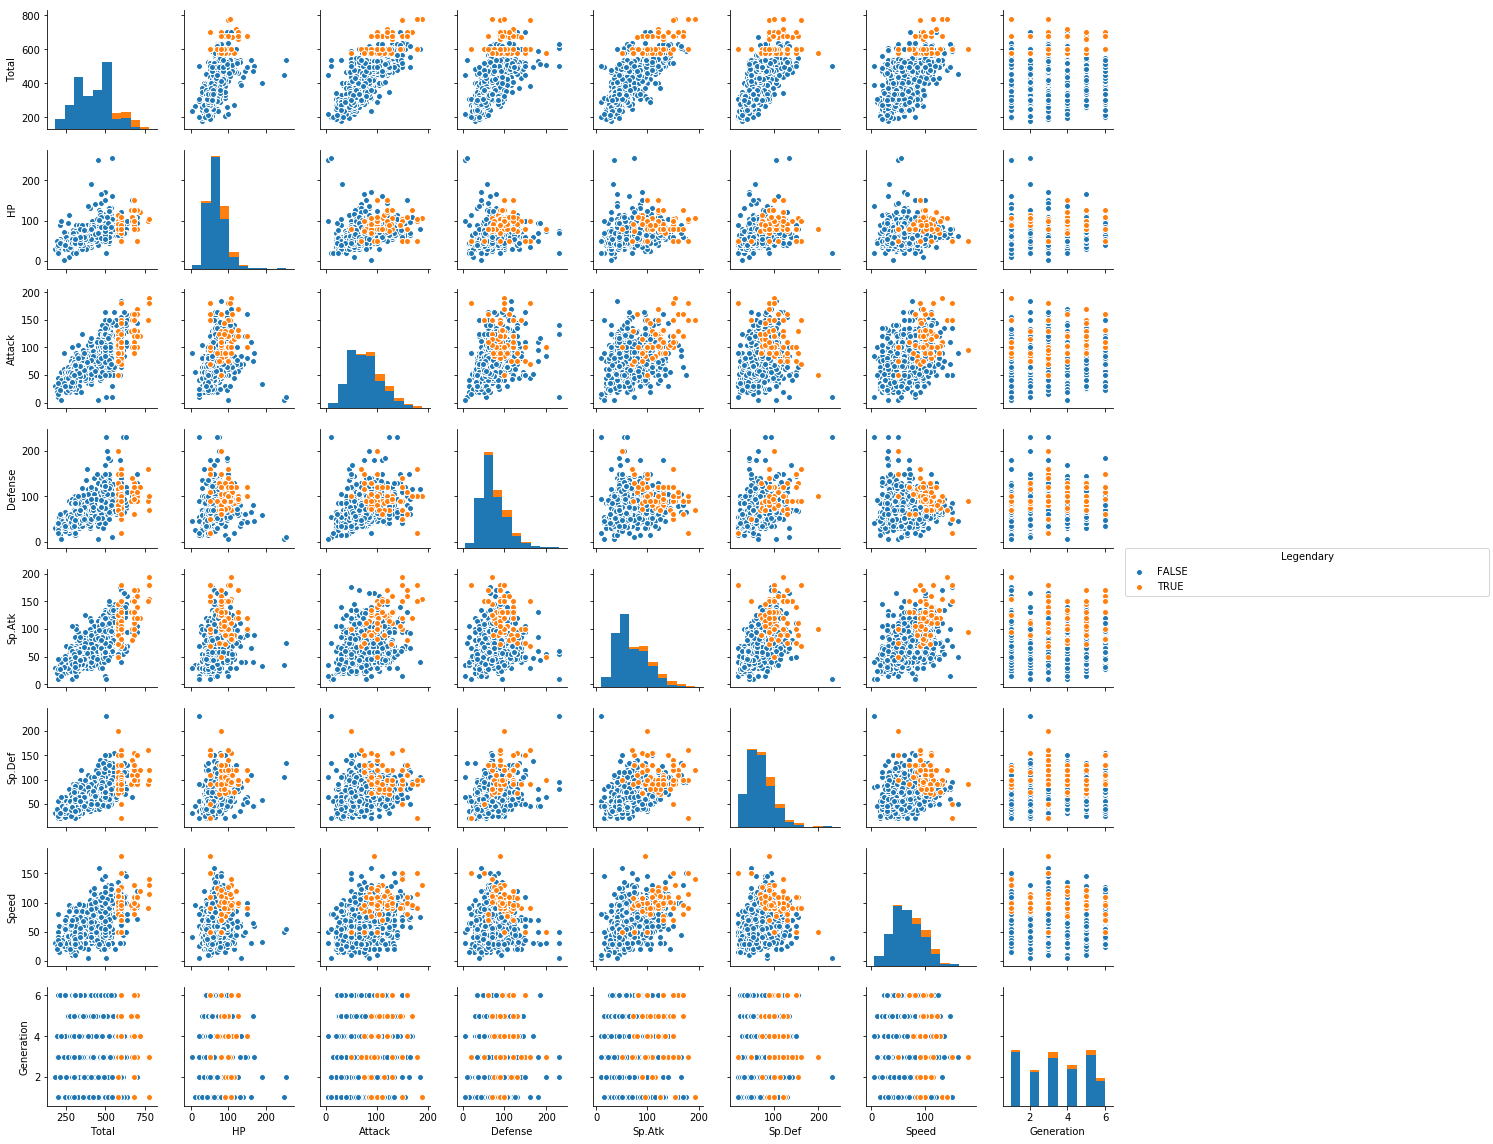

In [115]:
sns.pairplot(pokemon,hue='Legendary',size=2)

### Label data

In [121]:
# Groupby lebel column
pokemon.groupby('Legendary').mean()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation
Legendary,,,,,,,,
FALSE,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
TRUE,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231


looking at the mean of project data, seem like in goal, project is successful is lower than projest is not successful which is make senes same as usd_goal_real. However,high pledged project is most likely to be successful than low pledged project and same to buckers, used pledged, and used pledged_real as well.

In [122]:
pokemon['Legendary'].value_counts()

FALSE                                                                                                   735
TRUE                                                                                                     65
Name: Legendary, dtype: int64

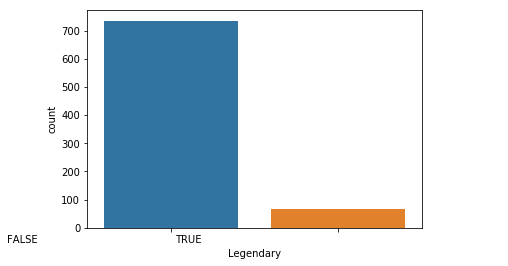

In [123]:
sns.countplot(x='Legendary', data=pokemon)
plt.show()

# Data Preparation

### Missing values

In [124]:
# find missing values
col_missing_values = pokemon.columns[pokemon.isnull().any()]
# sum missing valuse
pokemon[col_missing_values].isnull().sum()

Type2    386
dtype: int64

In [125]:
# drop off columns missing values
pokemon = pokemon.dropna()

In [126]:
# check if still have null values
pokemon.columns[pokemon.isnull().any()]

Index([], dtype='object')

### Category variable

In [127]:
pd.unique(pokemon['Generation'])

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [128]:
pd.unique(pokemon['Type1'])

array(['Grass                                                                                               ',
       'Fire                                                                                                ',
       'Bug                                                                                                 ',
       'Normal                                                                                              ',
       'Poison                                                                                              ',
       'Water                                                                                               ',
       'Rock                                                                                                ',
       'Electric                                                                                            ',
       'Ghost                                                                                               ',
 

In [129]:
pd.unique(pokemon['Type2'])

array(['Poison                                                                                              ',
       'Flying                                                                                              ',
       'Dragon                                                                                              ',
       'Ground                                                                                              ',
       'Fairy                                                                                               ',
       'Grass                                                                                               ',
       'Fighting                                                                                            ',
       'Psychic                                                                                             ',
       'Steel                                                                                               ',
 

In [130]:
# create dummy for category variables
Type_1_dummy = pd.get_dummies(pokemon['Type1'])
Type_2_dummy = pd.get_dummies(pokemon['Type2'])
Generation_dummy = pd.get_dummies(pokemon['Generation'])
Type_1_dummy.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [131]:
# create name for category variables
Type_1_dummy.columns = ['T1_Grass', 'T1_Fire', 'T1_Water', 'T1_Bug', 'T1_Normal', 'T1_Poison', 'T1_Electric',
       'T1_Ground', 'T1_Fairy', 'T1_Fighting', 'T1_Psychic', 'T1_Rock', 'T1_Ghost', 'T1_Ice',
       'T1_Dragon', 'T1_Dark', 'T1_Steel', 'T1_Flying']
Type_2_dummy.columns = ['T2_Poison', 'T2_Flying', 'T2_Dragon', 'T2_Ground', 'T2_Fairy', 'T2_Grass',
       'T2_Fighting', 'T2_Psychic', 'T2_Steel', 'T2_Ice', 'T2_Rock', 'T2_Dark', 'T2_Water',
       'T2_Electric', 'T2_Fire', 'T2_Ghost', 'T2_Bug', 'T2_Normal']
Generation_dummy.columns = ['G1','G2','G3','G4','G5','G6']

In [132]:
# Concat 2 dummies
dummy = pd.concat([Type_1_dummy,Type_2_dummy,Generation_dummy],axis=1)

In [133]:
# concate dummy by drop column Type 1 and Type 2 and concate dummy instead
pokemon = pokemon.drop(['Type1','Type2','Generation'],axis=1)
pokemon = pd.concat([pokemon,dummy],axis=1)

### Remove Collinear 

In [134]:
# create pearson correlation 
pearson_correlation = pokemon.corr()
pearson_correlation

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,T1_Grass,T1_Fire,T1_Water,...,T2_Fire,T2_Ghost,T2_Bug,T2_Normal,G1,G2,G3,G4,G5,G6
Total,1.000000,0.669066,0.754465,0.598596,0.746982,0.691391,0.561656,-0.152389,-0.012146,0.317435,...,0.054696,-0.034076,0.056131,-0.059539,-0.036999,-0.064887,-0.010871,0.080520,0.022721,0.006485
HP,0.669066,1.000000,0.518707,0.248920,0.456355,0.328665,0.271853,-0.207414,-0.008493,0.241802,...,0.020106,-0.021092,-0.062294,-0.064917,-0.049344,-0.004275,-0.083291,0.058064,0.108584,-0.032895
Attack,0.754465,0.518707,1.000000,0.401001,0.408570,0.257964,0.403546,-0.061510,0.034454,0.270581,...,-0.074122,0.004592,0.066282,-0.072432,-0.028183,-0.094633,0.042449,0.025594,0.042449,-0.000373
Defense,0.598596,0.248920,0.401001,1.000000,0.196778,0.528286,-0.030993,-0.045935,-0.036587,0.119291,...,0.066482,0.271138,0.181637,0.031004,-0.037523,0.013292,-0.029128,0.045467,-0.025219,0.046264
Sp.Atk,0.746982,0.456355,0.408570,0.196778,1.000000,0.480027,0.435450,-0.206696,-0.038148,0.268306,...,0.095724,-0.143539,0.004764,-0.014120,0.019984,-0.124073,0.048113,0.060169,-0.009866,-0.009531
Sp.Def,0.691391,0.328665,0.257964,0.528286,0.480027,1.000000,0.208259,-0.052320,-0.019270,0.184589,...,0.126939,-0.046870,0.090866,-0.046391,-0.082996,0.053003,-0.024825,0.101521,-0.038069,0.006569
Speed,0.561656,0.271853,0.403546,-0.030993,0.435450,0.208259,1.000000,-0.057761,0.020555,0.195985,...,-0.010637,-0.226668,-0.092732,-0.087816,0.016668,-0.079767,-0.028762,0.041562,0.036766,0.006317
T1_Grass,-0.152389,-0.207414,-0.061510,-0.045935,-0.206696,-0.052320,-0.057761,1.000000,-0.087611,-0.087611,...,-0.111543,0.050063,0.137664,-0.030583,0.022421,0.087868,-0.060342,-0.028012,0.085963,-0.118102
T1_Fire,-0.012146,-0.008493,0.034454,-0.036587,-0.038148,-0.019270,0.020555,-0.087611,1.000000,-0.053435,...,0.013253,-0.043246,0.043383,-0.043246,-0.111376,0.071678,-0.059642,-0.041799,0.133695,0.015666
T1_Water,0.317435,0.241802,0.270581,0.119291,0.268306,0.184589,0.195985,-0.087611,-0.053435,1.000000,...,0.094537,-0.043246,-0.054762,-0.043246,-0.083226,-0.090479,0.161315,0.017976,0.023217,-0.051894


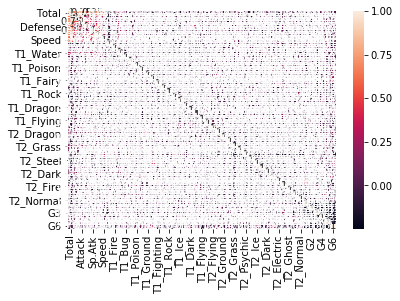

In [135]:
# see correlation in heatmap
sns.heatmap(pearson_correlation, annot=True)

In [136]:
# Select upper triangle 
upper = pearson_correlation.where(np.triu(np.ones(pearson_correlation.shape), k=1).astype(np.bool))
# select the columns have high correlation at  over 0.95
high_correlation = [column for column in upper.columns if any(upper[column] > 0.95)]
high_correlation

[]

Lucky dose not have high correlation to get rid off

# Modeling

In [137]:
# idenify target and dat
Y = pokemon.Legendary
X = pokemon.drop(['Legendary','Name'],axis=1)


In [138]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.75,random_state=5)

# Logistics Regression

In [139]:
logis_model = LogisticRegression()
# fit training model
logis_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
# Prediction
logis_predict_Y = logis_model.predict(X_test)
logis_predict_prob = logis_model.predict_proba(X_test)[:, 1]
logis_predict_prob
Y_test

687    FALSE                                         ...
290    FALSE                                         ...
102    FALSE                                         ...
159    TRUE                                          ...
311    FALSE                                         ...
542    TRUE                                          ...
712    TRUE                                          ...
409    FALSE                                         ...
154    FALSE                                         ...
790    FALSE                                         ...
214    FALSE                                         ...
484    FALSE                                         ...
100    FALSE                                         ...
735    FALSE                                         ...
758    FALSE                                         ...
482    FALSE                                         ...
441    FALSE                                         ...
686    FALSE                   

# Evaluation Calssification 

### Accuracy of Classification

In [141]:
print ('The Accuracy of Model')
print ('Logistics Regression: ',metrics.accuracy_score(Y_test,logis_predict_Y))

The Accuracy of Model
Logistics Regression:  0.909967845659164


###  ROC Logistic Regression

C:\Users\Ann\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


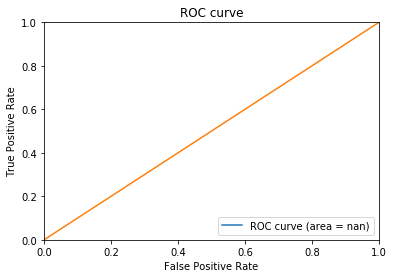

In [146]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, logis_predict_prob)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

In [147]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [148]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, logis_predict_Y)

In [149]:
report = classification_report(Y_test, logis_predict_Y)
report

'                                                                                                      precision    recall  f1-score   support\n\nFALSE                                                                                                      0.92      0.99      0.95       281\nTRUE                                                                                                       0.62      0.17      0.26        30\n\n                                                                                         avg / total       0.89      0.91      0.89       311\n'

In [150]:
TP = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
p = TP / (TP + FP)

In [151]:
# assing the results in dictionary
Results = {
    'True Positive Rate' : TP
    'False Negative Rate' : FN
    'Precision' : P
}
# connect redis
conn = redis.Redis(host='localhost', port=6379, db=0)
#Store the results 
conn.hmset("evaDict", Results)
# retrive the result
conn.hgetall("evaDict")


SyntaxError: invalid syntax (<ipython-input-151-3c9dbf046774>, line 4)